In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d shivan118/big-mart-sales-prediction-datasets

Dataset URL: https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets
License(s): CC0-1.0
  0% 0.00/327k [00:00<?, ?B/s]
100% 327k/327k [00:00<00:00, 671MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/big-mart-sales-prediction-datasets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df_train.shape

(8523, 12)

In [12]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [19]:
# so rather than just dropping missing values we replace them with mean/mode
df_train['Item_Weight'].mean()
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

df_train['Outlet_Size'].mode()
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

In [18]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Data Analysis

In [20]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/tmp/ipython-input-3913448057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Weight'])


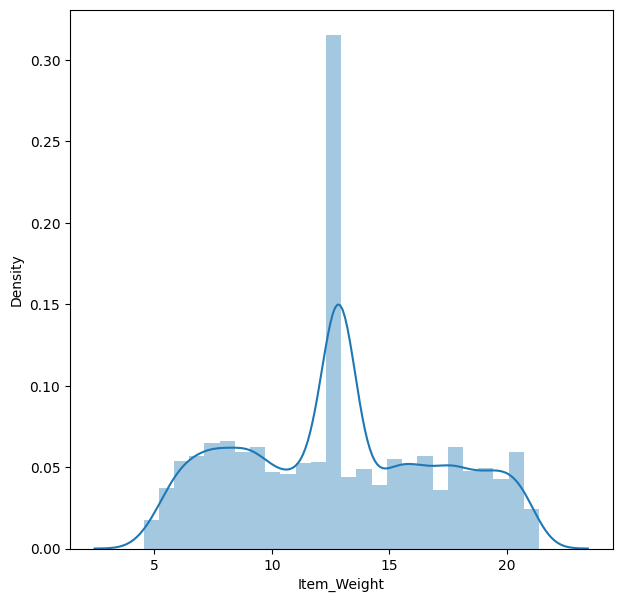

In [24]:
plt.figure(figsize=(7,7))
sns.distplot(df_train['Item_Weight'])
plt.show()

/tmp/ipython-input-2040903848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outlet_Size', data = df_train, saturation = 1, palette = 'Set2')


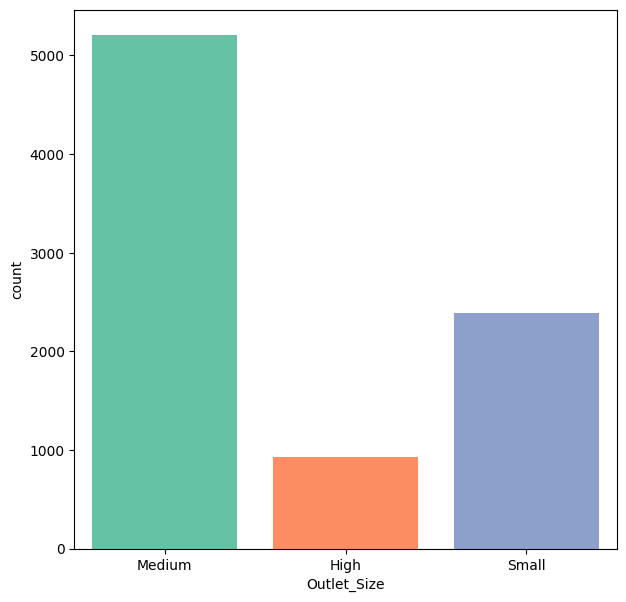

In [31]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'Outlet_Size', data = df_train, saturation = 1, palette = 'Set2')
plt.show()

In [42]:
# Function to categorize sales into Low, Medium, High
def categorize_sales(sales):
    if sales <= 1000:
        return 'Low'
    elif 1000 < sales <= 2000:
        return 'Medium'
    else:
        return 'High'

# Create a new column for the categorized target
df_train['Sales_Category'] = df_train['Item_Outlet_Sales'].apply(categorize_sales)

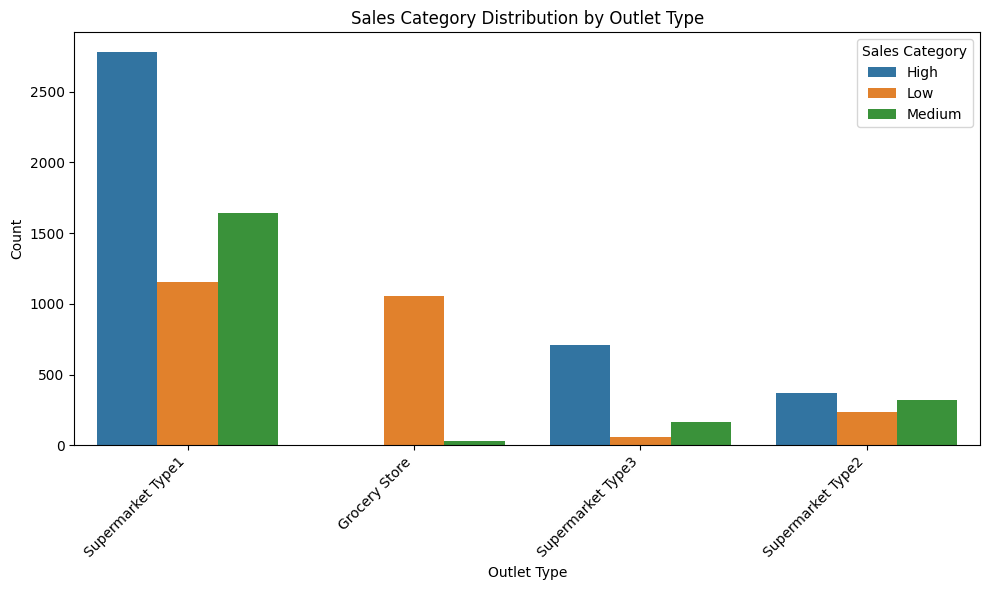

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type', hue='Sales_Category', data=df_train, order=df_train['Outlet_Type'].value_counts().index)
plt.title('Sales Category Distribution by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales Category')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [33]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [38]:
df_train.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}},inplace=True)
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [45]:
# now we do encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Sales_Category             8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 932.

In [47]:
object_cols = df_train.select_dtypes(include=['object'])
object_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Category
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,High
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Low
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,High
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Low
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,Low
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,High
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1,Low
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Medium
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Medium


In [49]:
encode_data = df_train.copy()
for col in object_cols:
  encode_data[col] = encoder.fit_transform(encode_data[[col]])
  print(f"Categories for column '{col}': {encoder.categories_}")

Categories for column 'Item_Identifier': [array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
      dtype=object)]
Categories for column 'Item_Fat_Content': [array(['Low Fat', 'Regular'], dtype=object)]
Categories for column 'Item_Type': [array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
Categories for column 'Outlet_Identifier': [array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
Categories for column 'Outlet_Size': [array(['High', 'Medium', 'Small'], dtype=object)]
Categories for column 'Outlet_Location_Type': [array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
Categories for column 'Outlet_Type': [array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Sup

In [50]:
encode_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales_Category
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,0.0
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,1.0
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,0.0
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800,1.0
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834,0.0
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850,1.0
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136,2.0
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976,2.0


In [51]:
X = encode_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y = encode_data['Item_Outlet_Sales']

### RandomForest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.7567555173136397


### XGBRFRegressor

In [53]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.7770171221639222


In [55]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
xg1 = xg.fit(X,y)

xg_df = pd.DataFrame({
            'feature' : X.columns,
            'XGBRF_importance' : xg1.feature_importances_
        }).sort_values(by = 'XGBRF_importance', ascending = False)

xg_df

,feature,XGBRF_importance
11,Sales_Category,0.864882
10,Outlet_Type,0.059760
5,Item_MRP,0.031217
7,Outlet_Establishment_Year,0.028169
6,Outlet_Identifier,0.007169
0,Item_Identifier,0.001830
9,Outlet_Location_Type,0.001569
3,Item_Visibility,0.001385
2,Item_Fat_Content,0.001273
4,Item_Type,0.001059


In [58]:
X_copy = X.copy()
X_copy = X_copy.drop(columns= ['Item_Weight','Item_Visibility','Item_Type','Outlet_Establishment_Year','Item_Identifier','Item_Fat_Content','Outlet_Location_Type'], axis = 1)
X_copy

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Sales_Category
0,249.8092,9.0,1.0,1.0,0.0
1,48.2692,3.0,1.0,2.0,1.0
2,141.6180,9.0,1.0,1.0,0.0
3,182.0950,0.0,1.0,0.0,1.0
4,53.8614,1.0,0.0,1.0,1.0
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,0.0
8519,108.1570,7.0,1.0,1.0,1.0
8520,85.1224,6.0,2.0,1.0,2.0
8521,103.1332,3.0,1.0,2.0,2.0


In [59]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X_copy, y, cv=5, scoring='r2')
print("Average R² Score:", scores.mean())

Average R² Score: 0.7777163774796836


In [60]:
final_df = X_copy.copy()
final_df

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Sales_Category
0,249.8092,9.0,1.0,1.0,0.0
1,48.2692,3.0,1.0,2.0,1.0
2,141.6180,9.0,1.0,1.0,0.0
3,182.0950,0.0,1.0,0.0,1.0
4,53.8614,1.0,0.0,1.0,1.0
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,0.0
8519,108.1570,7.0,1.0,1.0,1.0
8520,85.1224,6.0,2.0,1.0,2.0
8521,103.1332,3.0,1.0,2.0,2.0


## Best Model

In [61]:
from xgboost import XGBRFRegressor

xg_final =  XGBRFRegressor()
xg_final.fit(final_df, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)
xg_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [63]:
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test, y_pred)

470.3083387204096

### Prediction on unseen data

In [66]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
print(f"Sales value is between {pred - 470.3} and {pred + 470.3}")

Sales value is between [1098.1914] and [2038.7915]
